# Task 1A: Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like loss curve, show confusion matrix, etc. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

**NOTE: The amount of things you can do in this notebook is limitless (hyperbole). But don't do too much at the cost of rest of your tasks. Remember to maintain the outputs while submitting this notebook.**

## Absolutely required items?

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

**NOTE: You may or may not delete these instruction cells after completion of the notebook.**

# Your solution

In [ ]:
# Start coding from here

In [1]:

from nnet import model
import torch
import matplotlib.pyplot as plt

In [2]:

# TODO: import torch and torchvision libraries
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# We will use torchvision's transforms and datasets

In [10]:
transformation = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
color_dataset = datasets.MNIST('mnist/',train=True,transform=None, download=True) #to show color images
train_dataset = datasets.MNIST('mnist/',train=True,transform=transformation, download=True)
# TODO: Defining torchvision transforms for preprocessing
# TODO: Using torchvision datasets to load MNIST
# TODO: Use torch.utils.data.DataLoader to create loaders for train and test
# NOTE: Use training batch size = 4 in train data loader.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,  batch_size=4, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(),download = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=4, shuffle=False)                 



In [11]:
x=[]
y=[]
for i in range(4):
    x.append(color_dataset.train_data[i])
    y.append(color_dataset.train_labels[i])

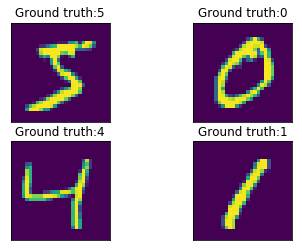

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x[i],interpolation='none')
    plt.title("Ground truth:{}".format(y[i]))
    plt.xticks([])
    plt.yticks([])

In [13]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([4, 1, 28, 28])

<Figure size 432x288 with 0 Axes>

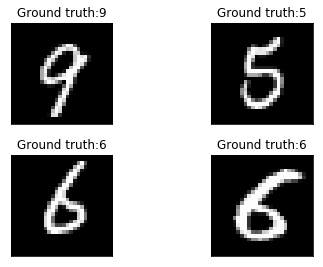

In [14]:
import matplotlib.pyplot as plt
fig= plt.Figure();
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0],cmap='gray',interpolation='none')
    plt.title("Ground truth:{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [5]:

# NOTE: Don't change these settings
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# NOTE: Don't change these settings
# Layer size
N_in = 28 * 28 # Input size
N_h1 = 256 # Hidden Layer 1 size
N_h2 = 256 # Hidden Layer 2 size
N_out = 10 # Output size
# Learning rate
lr = 0.15

Test Accuracy : 83.7 %
creloss : 7.226986090342203e-05 


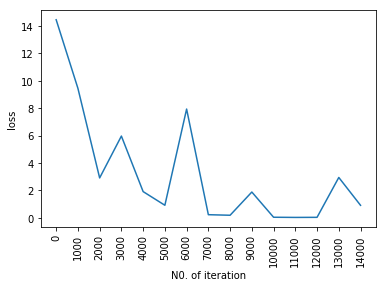

Test Accuracy of eval: 95.46666666666667 %
creloss of the eval: 1.1087846755981445e-05 


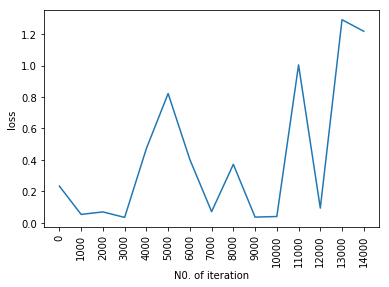

Test Accuracy : 95.94333333333333 %
creloss : 3.6663216849168143e-06 


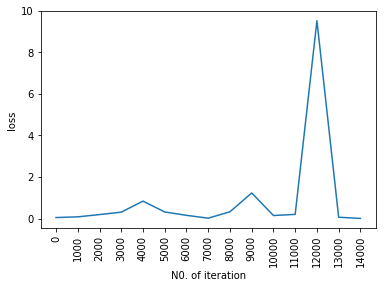

Test Accuracy of eval: 96.92833333333333 %
creloss of the eval: 3.5881559054056803e-06 


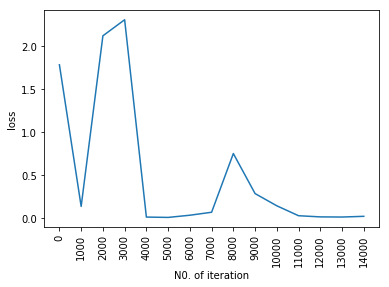

Test Accuracy : 97.09833333333333 %
creloss : 1.623075803120931e-05 


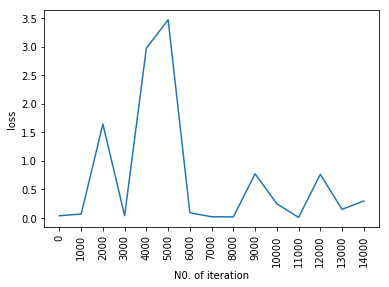

Test Accuracy of eval: 97.28833333333333 %
creloss of the eval: 4.3012890964746475e-07 


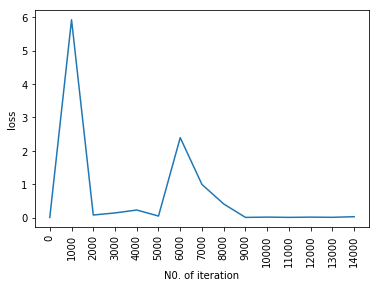

Test Accuracy : 97.78833333333333 %
creloss : 7.641854286193848e-05 


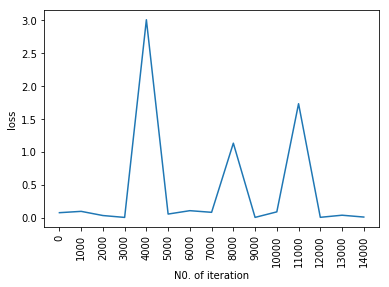

Test Accuracy of eval: 98.22 %
creloss of the eval: 3.394033263127009e-06 


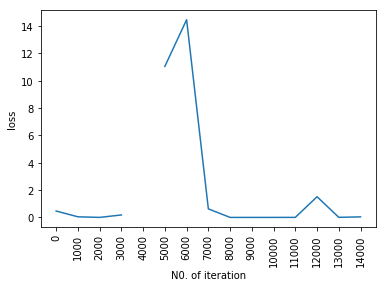

Test Accuracy : 98.15166666666667 %
creloss : 1.9385727246602377e-05 


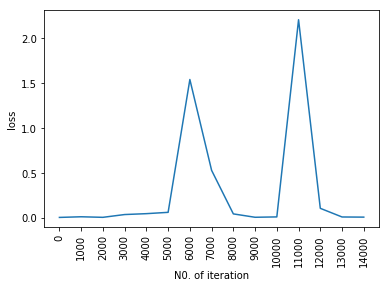

Test Accuracy of eval: 98.255 %
creloss of the eval: 1.952110603451729e-06 


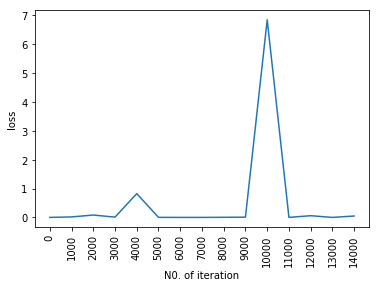

Test Accuracy : 98.56 %
creloss : 6.007265051205953e-06 


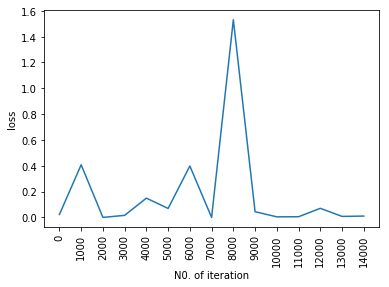

Test Accuracy of eval: 98.89666666666666 %
creloss of the eval: 4.498674844702085e-07 


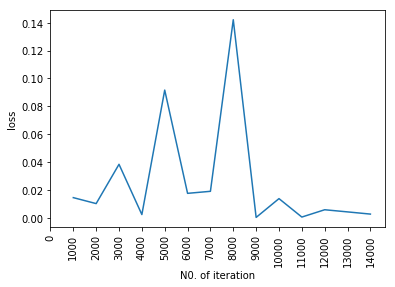

Test Accuracy : 98.73 %
creloss : 5.754210551579793e-06 


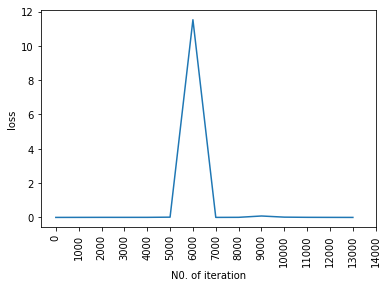

Test Accuracy of eval: 98.68666666666667 %
creloss of the eval: 0.00013118077913920086 


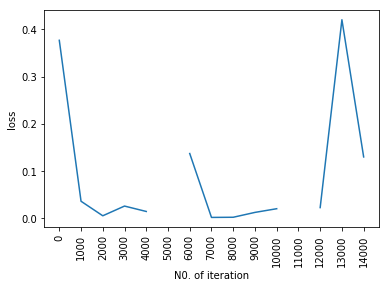

Test Accuracy : 98.935 %
creloss : 2.678506076335907e-06 


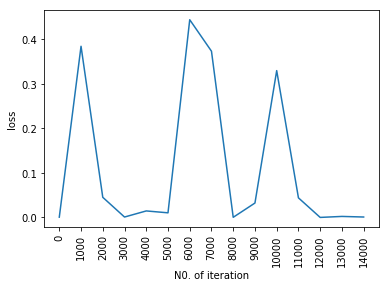

Test Accuracy of eval: 99.20166666666667 %
creloss of the eval: 3.555770963430405e-08 


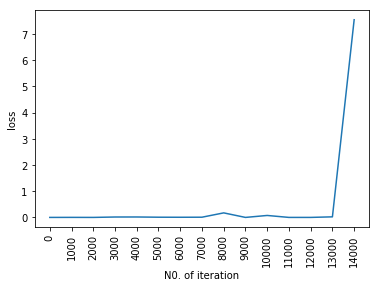

Test Accuracy : 98.965 %
creloss : nan 


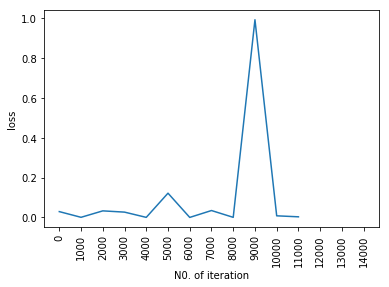

Test Accuracy of eval: 99.34 %
creloss of the eval: 1.5880373617013295e-06 


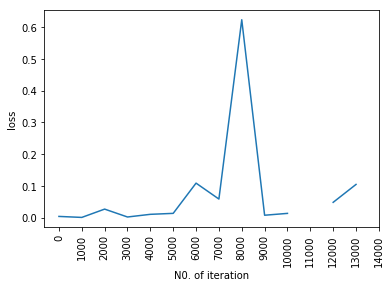

Test Accuracy : 99.14333333333333 %
creloss : 7.182379563649495e-05 


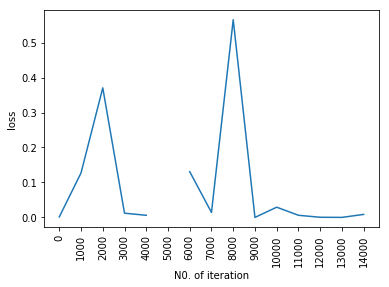

Test Accuracy of eval: 98.93 %
creloss of the eval: 1.9344791459540527e-07 


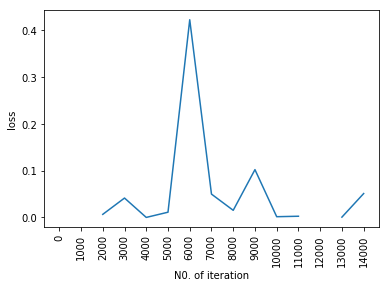

In [7]:
net = model.FullyConnected(N_in, N_h1, N_h2, N_out, device=device)
N_epoch = 10 # Or keep it as is
for i in range(0, N_epoch):
    cnt = 0
    total=0
    correct=0
    x=0
    creloss=0
    cost=[]
    index=[]
    for i,(images, labels) in enumerate(train_loader):
        
        images = images.view(images.shape[0],-1)

        creloss,accuracy,outputs=net.train( images, labels , lr, debug= False )
        if (i%1000==0):
            cost.append(creloss)
            index.append(i)
        score,idx=outputs.max(-1)
        total += labels.size(0)
        correct += (idx == labels).sum().item()
        creloss+=creloss
        x+=1
    print('Train Accuracy : {} %'.format(100 * correct / total))
    print('creloss : {} '.format(creloss / x))
    plt.plot(index,cost)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("N0. of iteration")
    plt.ylabel("loss")
    plt.show()


        
        
    count=0
    total=0
    correct=0
    x=0
    creloss=0
    cost=[]
    index=[]
    for i,(images, labels) in enumerate(train_loader):

        images = images.view(images.shape[0],-1)
        target=labels
        creloss,accuracy,outputs=net.eval( images, target,debug=False)
        if(i%1000==0):
            cost.append(creloss)
            index.append(i)
        score,idx=outputs.max(-1)

        correct += (idx == labels).sum().item()
        total += labels.size(0)
        creloss+=creloss
        x+=1
    print('Train Accuracy of eval: {} %'.format(100 * correct / total))
    print('creloss of the eval: {} '.format(creloss / x))
    plt.plot(index,cost)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("N0. of iteration")
    plt.ylabel("loss")
    plt.show()

In [15]:

cnt=0
total=0
for i,(images, labels) in enumerate(test_loader):
    
    #data= Variable(images,volatile=True)
    #data = data.view(-1, 28 * 28)
    classes=[0,1,2,3,4,5,6,7,8,9]
    images = images.view(images.shape[0],-1)
    score,idx=net.predict(images)
    tmp = []
    for i in labels:
        tmp.append(i.item())
    cntr = 0
    for i in idx:
        print("actual: ",classes[i.item()],"\t Predicted: ",classes[tmp[cntr]])
        if i.item() == tmp[cntr]:
            cnt+=1
        cntr+=1
    total+=4
print('Test Accuracy of test: {} %'.format(100 * cnt/ total))

actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  4 	 Predicted:  4
actual:  1 	 Predicted:  1
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  5
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  6 	 Predicted:  6
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  5 	 Predicted:  5
actual:  9 	 Predicted:  9
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  3 	 Predicted:  3
actual:  1 	 Predicted:  1
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  7 	 Predicted:  7
a

actual:  2 	 Predicted:  2
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  3 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  0 	 Predicted:  0
actual:  3 	 Predicted:  3
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  2 	 Predicted:  2
actual:  5 	 Predicted:  5
actual:  7 	 Predicted:  9
actual:  7 	 Predicted:  2
actual:  9 	 Predicted:  9
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  2
actual:  0 	 Predicted:  0
actual:  7 	 Predicted:  7
actual:  1 	 Predicted:  1
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  1 	 Predicted:  1
actual:  5 	 Predicted:  5
actual:  3 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  6 	 Predicted:  6
a

actual:  3 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  7 	 Predicted:  7
actual:  5 	 Predicted:  5
actual:  2 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  6
actual:  2 	 Predicted:  2
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  9
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  2
actual:  9 	 Predicted:  9
actual:  2 	 Predicted:  2
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  3
actual:  5 	 Predicted:  5
actual:  9 	 Predicted:  9
actual:  1 	 Predicted:  1
actual:  8 	 Predicted:  8
actual:  0 	 Predicted:  0
a

actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  7 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  3 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  3 	 Predicted:  3
actual:  5 	 Predicted:  5
actual:  5 	 Predicted:  5
actual:  8 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
a

actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  0 	 Predicted:  0
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  1 	 Predicted:  1
actual:  6 	 Predicted:  8
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  4 	 Predicted:  9
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  8
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  9 	 Predicted:  9
actual:  4 	 Predicted:  4
actual:  2 	 Predicted:  8
actual:  3 	 Predicted:  3
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  6
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  6 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
a

actual:  3 	 Predicted:  3
actual:  5 	 Predicted:  5
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  3
actual:  6 	 Predicted:  6
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  5
actual:  5 	 Predicted:  5
actual:  3 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  3 	 Predicted:  5
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  5
actual:  3 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  4 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  1 	 Predicted:  1
actual:  4 	 Predicted:  8
actual:  9 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  8
a

actual:  7 	 Predicted:  7
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  1
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  4
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  5 	 Predicted:  5
actual:  3 	 Predicted:  3
actual:  7 	 Predicted:  7
actual:  0 	 Predicted:  0
actual:  7 	 Predicted:  7
actual:  7 	 Predicted:  7
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  4 	 Predicted:  4
actual:  2 	 Predicted:  2
actual:  8 	 Predicted:  8
actual:  5 	 Predicted:  5
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  8
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  5 	 Predicted:  5
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
a

actual:  5 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  2 	 Predicted:  2
actual:  7 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  9 	 Predicted:  9
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  3 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  6 	 Predicted:  6
actual:  2 	 Predicted:  2
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  3 	 Predicted:  8
actual:  3 	 Predicted:  3
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  1 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  7 	 Predicted:  7
actual:  5 	 Predicted:  5
a

actual:  2 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  0 	 Predicted:  0
actual:  7 	 Predicted:  7
actual:  5 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
	 Predicted:  0
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  4 	 Predicted:  4
actual:  2 	 Predicted:  2
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  6
actual:  9 	 Predicted:  9
actual:  4 	 Predicted:  4
actual:  1 	 Predicted:  1
actual:  3 	 Predicted:  3
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  8 	 Predicted:  8
actual:  7 	 Predicted:  8
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  6
actual:  9 	 Predicted:  9
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  2 	 Predicted:  2
actual:  2 	

actual:  5 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  8 	 Predicted:  8
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  2
actual:  7 	 Predicted:  7
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  4 	 Predicted:  4
actual:  2 	 Predicted:  2
actual:  1 	 Predicted:  1
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  5 	 Predicted:  5
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  0 	 Predicted:  0
actual:  6 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  8 	 Predicted:  8
actual:  3 	 Predicted:  3
actual:  9 	 Predicted:  9
actual:  6 	 Predicted:  6
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
a

actual:  4 	 Predicted:  4
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  6
actual:  0 	 Predicted:  0
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
 4 	 Predicted:  4
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  3
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  5 	 Predicted:  5
actual:  

actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  4 	 Predicted:  4
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  7 	 Predicted:  7
actual:  3 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  6 	 Predicted:  6
actual:  1 	 Predicted:  1
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  6
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
a

actual:  9 	 Predicted:  9
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  8 	 Predicted:  8
actual:  1 	 Predicted:  1
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  3 	 Predicted:  3
actual:  3 	 Predicted:  3
actual:  8 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  4 	 Predicted:  4
actual:  0 	 Predicted:  0
actual:  9 	 Predicted:  9
actual:  1 	 Predicted:  1
actual:  7 	 Predicted:  7
actual:  2 	 Predicted:  2
actual:  9 	 Predicted:  9
actual:  1 	 Predicted:  1
actual:  5 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  3 	 Predicted:  3
actual:  2 	 Predicted:  2
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  6 	 Predicted:  6
actual:  4 	 Predicted:  4
actual:  3 	 Predicted:  3
actual:  7 	 Predicted:  7
a

actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  8 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  5 	 Predicted:  5
actual:  9 	 Predicted:  9
actual:  7 	 Predicted:  7
actual:  0 	 Predicted:  0
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  9 	 Predicted:  3
actual:  8 	 Predicted:  8
actual:  5 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  5
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  4 	 Predicted:  2
a

actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 actual:  1 	 Predicted:  1
actual:  8 	 Predicted:  8
actual:  8 	 Predicted:  8
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  0 	 Predicted:  0
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  7 	 Predicted:  7
actual:  5 	 Predicted:  5
actual:  0 	 Predicted:  0
actual:  6 	 Predicted:  6
actual:  1 	 Predicted:  1
actual:  5 	 Predicted:  5
actual:  7 	 Predicted:  7
actual:  4 	 Predicted:  4
actual:  6 	 Predicted:  6
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  5 	 Predicted:  5
actual:  0 	 Predicted:  0
actual:  7 	 Predicted:  7
actual:  9 	 Predicted:  9
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  4 	 Predicted:  4
actual:  8 	 Pred

actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  4 	 Predicted:  4
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  6 	 Predicted:  8
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
actual:  1 	 Predicted:  1
actual:  2 	 Predicted:  2
actual:  3 	 Predicted:  3
actual:  5 	 Predicted:  5
actual:  6 	 Predicted:  6
actual:  7 	 Predicted:  7
actual:  8 	 Predicted:  8
actual:  1 	 Predicted:  1
actual:  0 	 Predicted:  0
actual:  9 	 Predicted:  9
actual:  5 	 Predicted:  5
actual:  7 	 Predicted:  7
actual:  5 	 Predicted:  5
actual:  1 	 Predicted:  1
actual:  8 	 Predicted:  8
actual:  6 	 Predicted:  6
actual:  9 	 Predicted:  9
actual:  0 	 Predicted:  0
a